# Zomato Analysis Project
## Introduction
Zomato is India's largest online platform offering comprehensive information, menus, and user reviews of restaurants across various venues. It helps users select the perfect dining spot by providing detailed insights into restaurant offerings, diverse cuisines, taste preferences, and other viable options. Through this initiative, I aim to explore Zomato's extensive database to uncover hidden patterns, analyze customer behaviors, and reveal trends related to the evolving tastes of Indian consumers.

## Part I. Exploring the Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
zomato = pd.read_csv(r"C:\Users\Admin\Downloads\zomato.csv")

In [3]:
print(zomato.head())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

<br><br>
## Part II. Cleaning the Dataset

### Handle duplicate values

In [4]:
print(zomato.duplicated().sum())

0


In [5]:
# Drop duplicates
zomato = zomato.drop_duplicates().reset_index(drop=True)

<br><br>
### Drop redundant columns

In [6]:
columns_to_drop = ["url", "address", "phone", "votes", "dish_liked", "reviews_list", "menu_item", "listed_in(type)"]
zomato.drop(columns=columns_to_drop, inplace=True)
print(zomato.head())

                    name online_order book_table   rate      location  \
0                  Jalsa          Yes        Yes  4.1/5  Banashankari   
1         Spice Elephant          Yes         No  4.1/5  Banashankari   
2        San Churro Cafe          Yes         No  3.8/5  Banashankari   
3  Addhuri Udupi Bhojana           No         No  3.7/5  Banashankari   
4          Grand Village           No         No  3.8/5  Basavanagudi   

             rest_type                        cuisines  \
0        Casual Dining  North Indian, Mughlai, Chinese   
1        Casual Dining     Chinese, North Indian, Thai   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   
3          Quick Bites      South Indian, North Indian   
4        Casual Dining        North Indian, Rajasthani   

  approx_cost(for two people) listed_in(city)  
0                         800    Banashankari  
1                         800    Banashankari  
2                         800    Banashankari  
3                   

<br><br>
### Information about the dataset (non-null variable counts and types of the column)

In [7]:
print(zomato.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   location                     51696 non-null  object
 5   rest_type                    51490 non-null  object
 6   cuisines                     51672 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
 8   listed_in(city)              51717 non-null  object
dtypes: object(9)
memory usage: 3.6+ MB
None


<br><br>
### Shape of the dataset

In [8]:
print(zomato.shape)

(51717, 9)


The dataset consists of 51,717 rows and 9 features

<br><br>
### Description of the dataset

In [9]:
print(zomato.describe())

                   name online_order book_table   rate location    rest_type  \
count             51717        51717      51717  43942    51696        51490   
unique             8792            2          2     64       93           93   
top     Cafe Coffee Day          Yes         No    NEW      BTM  Quick Bites   
freq                 96        30444      45268   2208     5124        19132   

            cuisines approx_cost(for two people) listed_in(city)  
count          51672                       51371           51717  
unique          2723                          70              30  
top     North Indian                         300             BTM  
freq            2913                        7576            3279  


<br><br>
### Handle missing values

In [10]:
print(zomato.isnull().sum())

name                              0
online_order                      0
book_table                        0
rate                           7775
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(city)                   0
dtype: int64


#### "rate" missing values

In [11]:
zomato['rate'] = zomato['rate'].str.extract(r'(\d+\.\d+)')[0]
zomato['rate'] = pd.to_numeric(zomato['rate'], errors='coerce')
print(zomato['rate'].value_counts())

rate
3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: count, dtype: int64


In [12]:
mean_rating = zomato['rate'].mean()
# Impute missing values with the mean
zomato['rate'].fillna(mean_rating, inplace=True)

#### "cuisines" missing values

In [13]:
columns_to_fill = ['cuisines']
zomato[columns_to_fill] = zomato[columns_to_fill].fillna('Unknown')

In [14]:
# Cleaning 'cuisines' column (do not modify the original dataset)
zomato_copy = zomato.copy()

def clean_cuisine(cuisine):
    cuisine = cuisine.strip().lower()
    return cuisine

zomato_copy['cuisines'] = zomato_copy['cuisines'].apply(lambda x: [clean_cuisine(cuisine) for cuisine in x.split(',')])

from collections import Counter
cuisine_counter = Counter()

for index, row in zomato_copy.iterrows():
    cuisines = row['cuisines']
    for cui in cuisines:
        cuisine_counter[cui] += 1

cuisine_df = pd.DataFrame.from_dict(cuisine_counter, orient='index', columns=['count'])
cuisine_df = cuisine_df.reset_index().rename(columns={'index': 'cuisine'})

cuisine_df = cuisine_df.sort_values(by='count', ascending=False).reset_index(drop=True)
print(cuisine_df)

          cuisine  count
0    north indian  21085
1         chinese  15547
2    south indian   8644
3       fast food   8096
4         biryani   6492
..            ...    ...
103        sindhi      4
104     pan asian      3
105      hot dogs      3
106        indian      2
107       malwani      2

[108 rows x 2 columns]


#### Other missing values
For other missing values in the columns 'location,' 'rest_type,' and "approx_cost(for two people)," since they account for less than 5% of the total data, we can simply drop them

In [15]:
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].str.replace(',', '')
zomato['approx_cost(for two people)'] = pd.to_numeric(zomato['approx_cost(for two people)'], errors='coerce')
zomato.dropna(inplace=True)
zomato.reset_index(drop=True, inplace=True)

<br><br>
## Part III. Exploratory Data Analysis and Data Visualisation
### 1. Explore each feature

### Feature 1: online_order - Indicates whether a restaurant accepts online orders or not

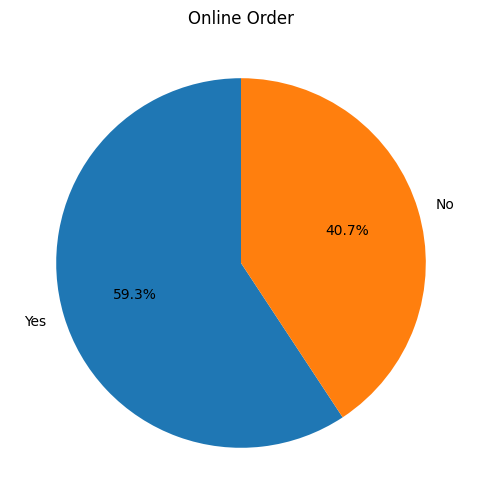

In [16]:
order_counts = zomato['online_order'].value_counts()
plt.figure(figsize=(6, 6))
order_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Online Order')
plt.ylabel('')
plt.show()

We can see that around 60% of the restaurants accept online order

<br><br>
### Feature 2: book_table - Indicates whether a restaurant accepts table bookings or not

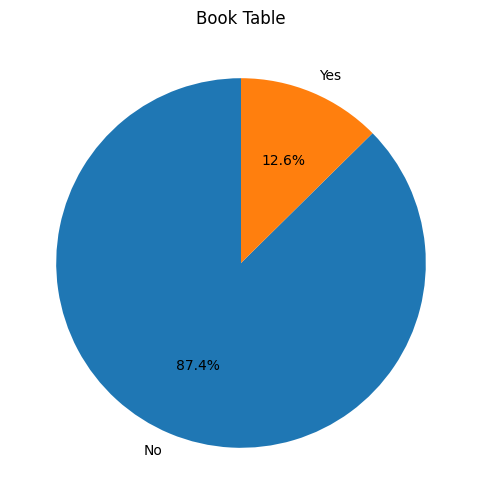

In [17]:
book_counts = zomato['book_table'].value_counts()
plt.figure(figsize=(6, 6))
book_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Book Table')
plt.ylabel('')
plt.show()

Most restaurants in the dataset do not accept table bookings. Only 12.6% of them do.

<br><br>
### Feature 3: rate - Rating from the customers

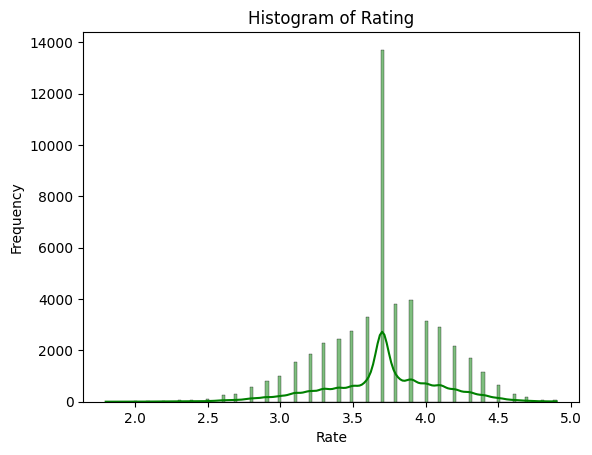

In [18]:
sns.histplot(x='rate', data=zomato, kde=True, color='green')
plt.title("Histogram of Rating")
plt.xlabel("Rate")
plt.ylabel("Frequency")
plt.show()

The value 3.7 has the highest frequency because missing values were imputed with the mean (3.7). Otherwise, the distribution of the rate is slightly left-skewed.

In [19]:
print(zomato['rate'].describe())

count    51167.000000
mean         3.701666
std          0.395137
min          1.800000
25%          3.500000
50%          3.700449
75%          3.900000
max          4.900000
Name: rate, dtype: float64


<br><br>
### Feature 4: rest_type - Types of Restaurants

C:\Users\Admin\AppData\Local\Temp\ipykernel_9828\349531051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='rest_type', data=top_10_rest_type, palette='viridis')


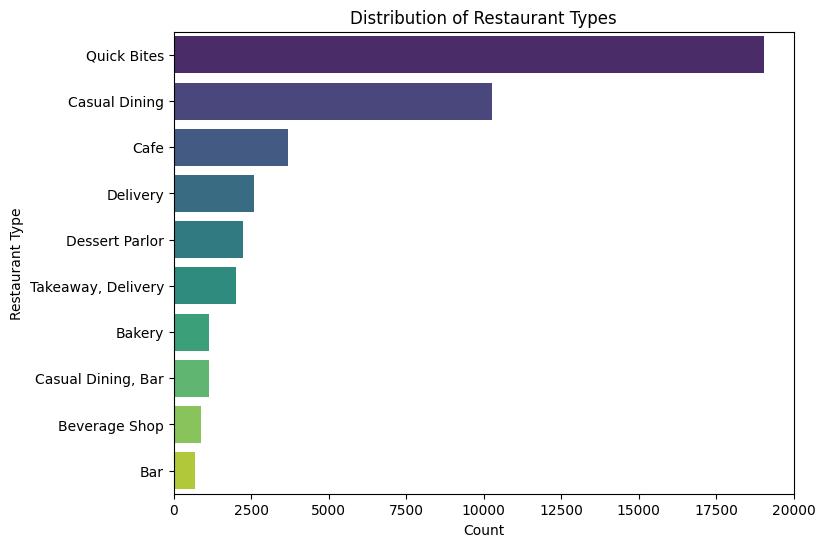

In [20]:
top_10_rest_type = pd.DataFrame(zomato['rest_type'].value_counts()[:10])
plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='rest_type', data=top_10_rest_type, palette='viridis')
plt.title('Distribution of Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.show()

Quick Bites is the most popular restaurant type, with more than twice the number of establishments compared to the second most common, Casual Dining

<br><br>
### Feature 5: cuisines

C:\Users\Admin\AppData\Local\Temp\ipykernel_9828\3946738085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='cuisine', data=top_10_cuisine, palette='viridis')


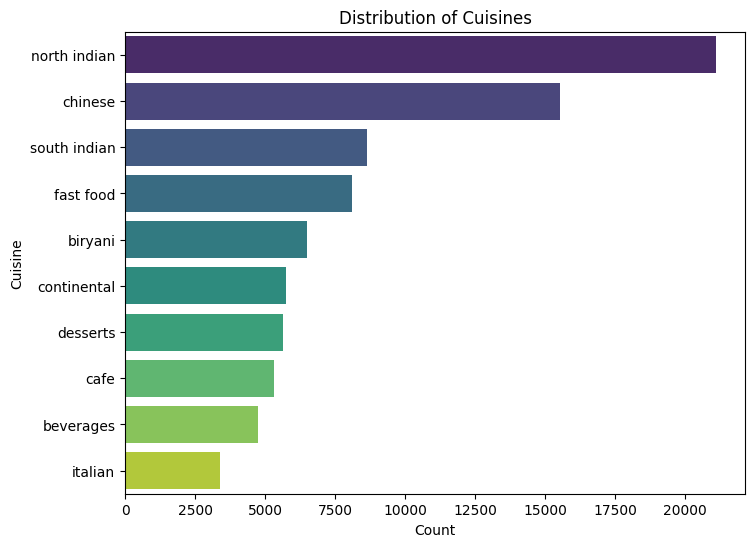

In [21]:
top_10_cuisine = cuisine_df[:10]
plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='cuisine', data=top_10_cuisine, palette='viridis')
plt.title('Distribution of Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()

North Indian is the most popular cuisine, followed by Chinese and South Indian.

<br><br>
### Feature 6: approx_cost(for two people)

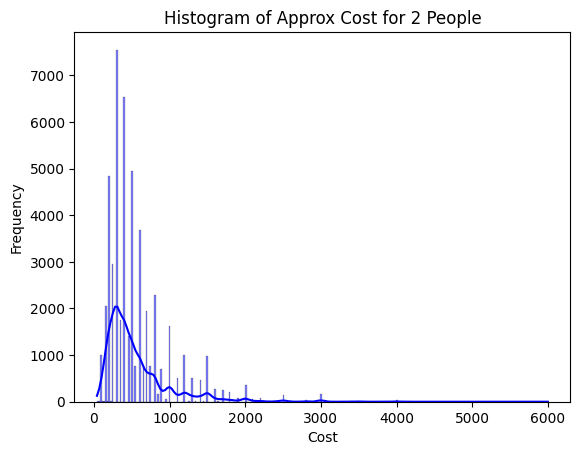

In [22]:
sns.histplot(x='approx_cost(for two people)', data=zomato, kde=True, color='blue')
plt.title("Histogram of Approx Cost for 2 People")
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.show()

In [23]:
print(zomato['approx_cost(for two people)'].describe())

count    51167.000000
mean       555.970157
std        439.500518
min         40.000000
25%        300.000000
50%        400.000000
75%        700.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64


The mean cost for two people is approximately 555 Rupees, while the median is 400 Rupees. The cost distribution is highly right-skewed, indicating the presence of many large outliers (expensive restaurants).

<br><br>
### Feature 7: listed_in(city)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9828\3851390037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='listed_in(city)', data=top_10_city, palette='viridis')


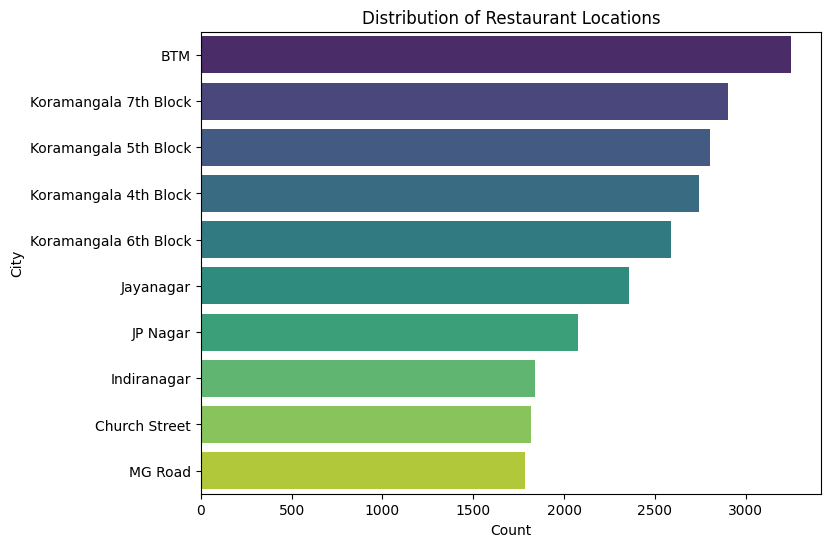

In [24]:
top_10_city = pd.DataFrame(zomato['listed_in(city)'].value_counts()[:10])
plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='listed_in(city)', data=top_10_city, palette='viridis')
plt.title('Distribution of Restaurant Locations')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

Koramangala is a popular location for restaurants in the dataset, followed by BTM and Jayanagar.

<br><br>
## 2. Explore the correlation between different features

### Correlation between 'online_order' and 'rate'

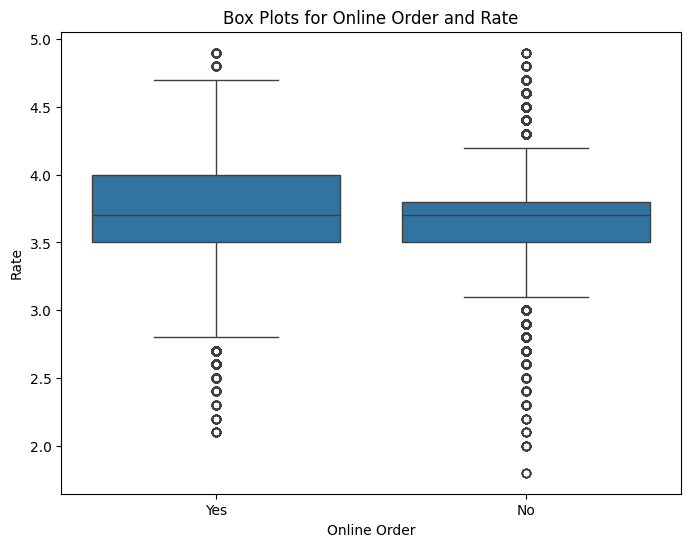

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='online_order', y='rate', data=zomato)
plt.title('Box Plots for Online Order and Rate')
plt.xlabel('Online Order')
plt.ylabel('Rate')
plt.show()

There is no significant difference in the average rating between restaurants that accept online orders and those that do not. However, the range of ratings is wider for restaurants accepting online orders, indicating they have both higher and lower ratings compared to those that do not.

<br><br>
### Correlation between 'book_table' and 'rate'

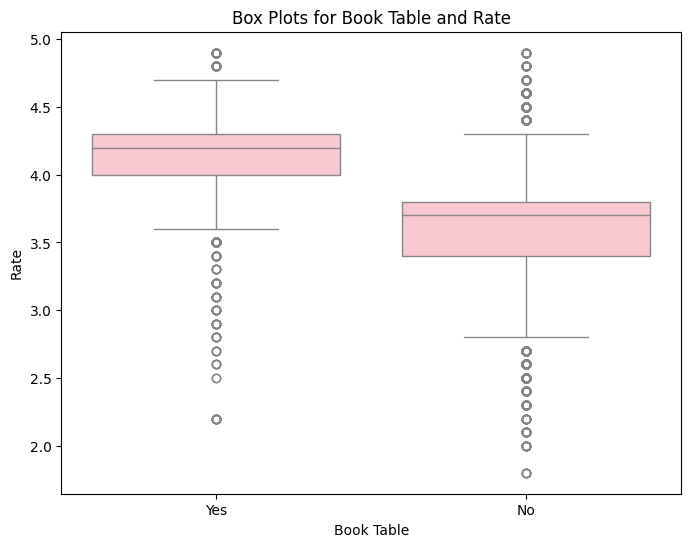

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='book_table', y='rate', data=zomato, color='pink')
plt.title('Box Plots for Book Table and Rate')
plt.xlabel('Book Table')
plt.ylabel('Rate')
plt.show()

The boxplots show that restaurants accepting table bookings tend to have higher average ratings than those that do not. More than half of the restaurants with table bookings have ratings above 4.0, whereas more than half of those not accepting table bookings have ratings below 4.0.

<br><br>
### Correlation between 'rest_type' and 'rate'

To determine whether certain types of restaurants have higher ratings than others, we will create boxplots comparing the ratings of the top 10 most popular restaurant types.

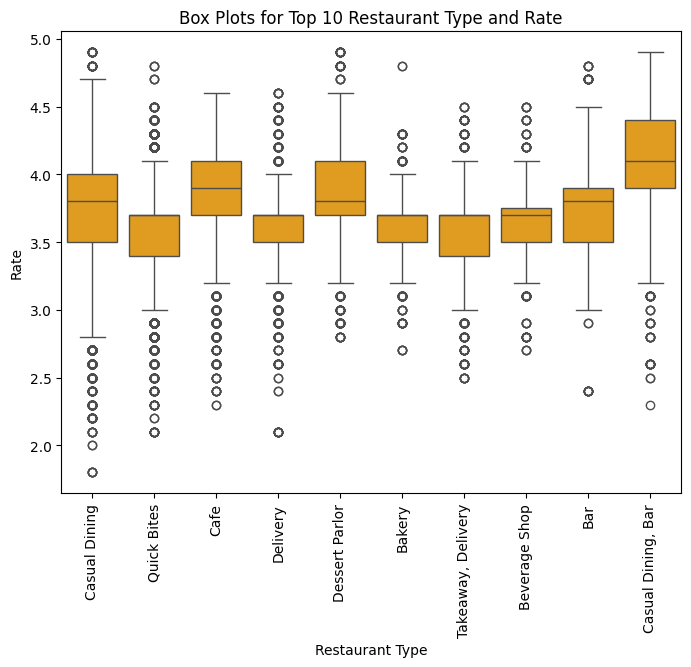

In [27]:
top_10_types = zomato['rest_type'].value_counts().nlargest(10).index
filtered_top_10 = zomato[zomato['rest_type'].isin(top_10_types)]

plt.figure(figsize=(8, 6))
sns.boxplot(x='rest_type', y='rate', data=filtered_top_10, color='orange')
plt.title('Box Plots for Top 10 Restaurant Type and Rate')
plt.xlabel('Restaurant Type')
plt.ylabel('Rate')
plt.xticks(rotation=90)
plt.show()

Among the top 10 most popular restaurant types, Casual Dining & Bar has the highest average rating, with a median of around 4.0. In contrast, Quick Bites, Delivery, Bakery, and Takeaway & Delivery have the lowest average ratings, with medians around 3.7.

C:\Users\Admin\AppData\Local\Temp\ipykernel_9828\6567858.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rate', y='rest_type', data=average_ratings, palette='viridis')


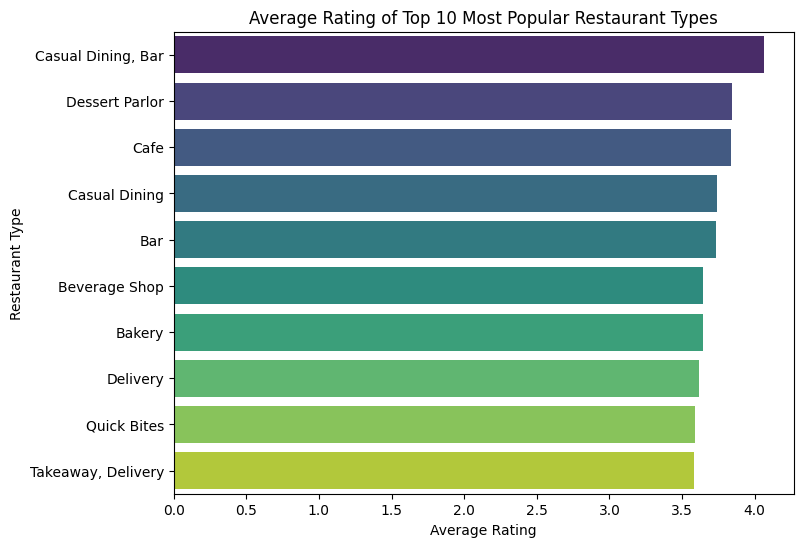

In [28]:
average_ratings = filtered_top_10.groupby('rest_type')['rate'].mean().reset_index().sort_values(by='rate', ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x='rate', y='rest_type', data=average_ratings, palette='viridis')
plt.title('Average Rating of Top 10 Most Popular Restaurant Types')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Type')
plt.show()

Casual Dining & Bar has the highest average rating, followed by Dessert Parlor and Cafe.

<br><br>
### Correlation between 'cuisines' and 'rate'

In [29]:
zomato['cuisines'] = zomato['cuisines'].str.split(',')

zomato_exploded = zomato.explode('cuisines')

zomato_exploded['cuisine'] = zomato_exploded['cuisines'].str.strip().str.lower()

zomato_merged = zomato_exploded.merge(cuisine_df, on='cuisine', how='left')

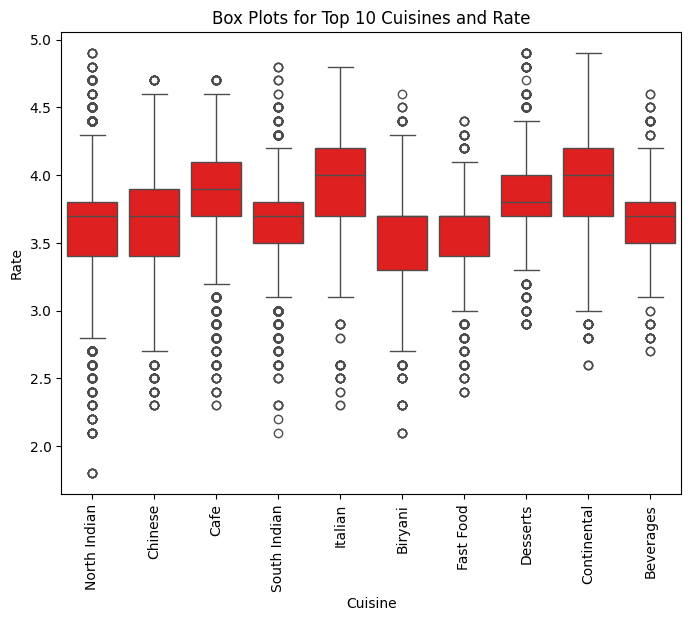

In [30]:
top_10_cuisines = cuisine_df.head(10)['cuisine'].tolist()
top_10_cuisines_rate = zomato_merged[zomato_merged['cuisines'].str.lower().isin(top_10_cuisines)]

plt.figure(figsize=(8, 6))
sns.boxplot(x='cuisines', y='rate', data=top_10_cuisines_rate, color='red')
plt.title('Box Plots for Top 10 Cuisines and Rate')
plt.xlabel('Cuisine')
plt.ylabel('Rate')
plt.xticks(rotation=90)
plt.show()

Italian and Continential cuisines tend to have the highest ratings among all the top 10 most popular cuisines, with the medians being around 4.0.

<br><br>
### Correlation between 'approx_cost(for two people)' and 'rate'

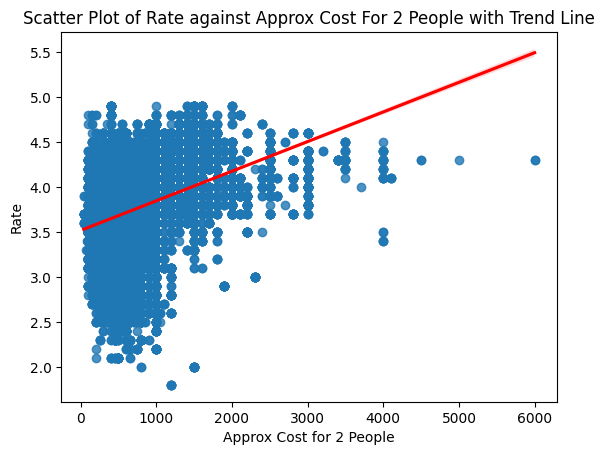

In [31]:
sns.regplot(data=zomato, x='approx_cost(for two people)', y='rate', line_kws={'color': 'red'})
plt.title('Scatter Plot of Rate against Approx Cost For 2 People with Trend Line')
plt.xlabel('Approx Cost for 2 People')
plt.ylabel('Rate')
plt.show()

There is a slightly positive relationship between cost and rating.

<br><br>
### Heat Map between every numerical features

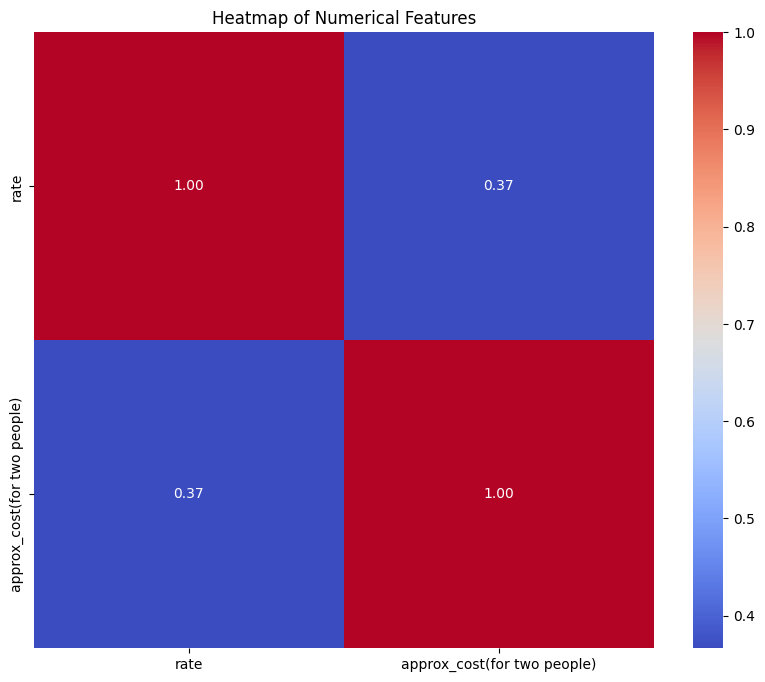

In [32]:
numeric_zomato = zomato.select_dtypes(include=['number'])
correlation_matrix = numeric_zomato.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Numerical Features")
plt.show()

A correlation coefficient of 0.37 indicates a positive but weak-to-moderate linear relationship between cost and rating. However, the relationship is relatively weak, so the cost of dining at a restaurant does not reliably predict whether it has a high rating or not.

<br><br>
### Correlation between location and "rate"

C:\Users\Admin\AppData\Local\Temp\ipykernel_9828\389359269.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rate', y='listed_in(city)', data=top_10_locations, palette='viridis')


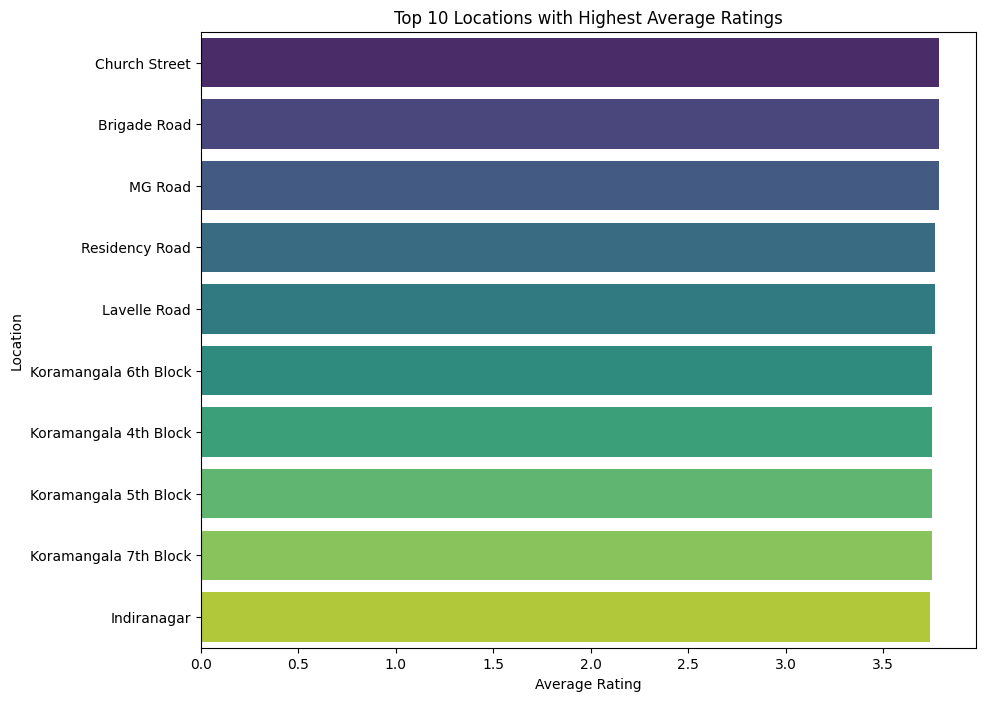

In [33]:
avg_ratings_loc = zomato.groupby('listed_in(city)')['rate'].mean().reset_index()
avg_ratings_loc = avg_ratings_loc.sort_values(by='rate', ascending=False)
top_10_locations = avg_ratings_loc.head(10)
plt.figure(figsize=(10, 8))
sns.barplot(x='rate', y='listed_in(city)', data=top_10_locations, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.title('Top 10 Locations with Highest Average Ratings')
plt.show()

Church Street has the highest average rating among all locations. However, the bar charts show that the differences in average ratings among the top 10 locations are not very clear.

<br><br>
### Correlation between online order and cost

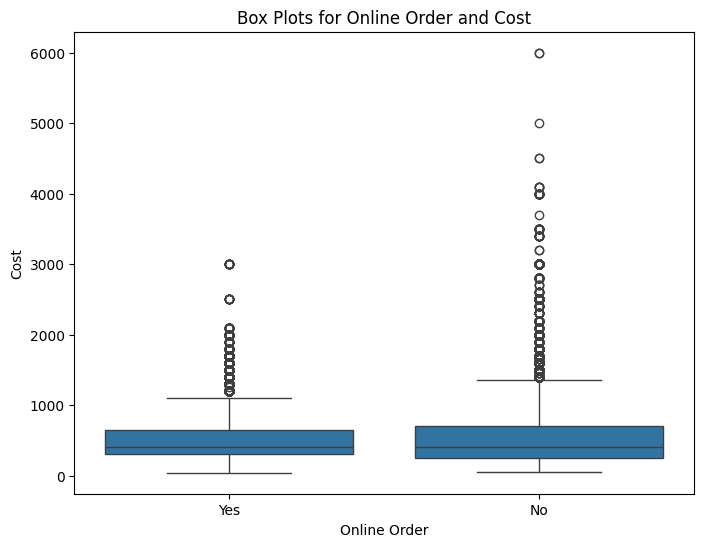

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='online_order', y='approx_cost(for two people)', data=zomato)
plt.title('Box Plots for Online Order and Cost')
plt.xlabel('Online Order')
plt.ylabel('Cost')
plt.show()

Restarants without online order set a slighly higher price range than those do.

<br><br>
### Which types of restaurants are most likely to offer online order and table booking?

In [35]:
online_order_res = zomato[zomato['online_order']=='Yes']
online_count = pd.DataFrame(online_order_res.groupby('rest_type').size().sort_values(ascending=False).head(10))
online_count = online_count.rename(columns={0: 'count'}).reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9828\1988231722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='rest_type', data=online_count, palette='viridis')


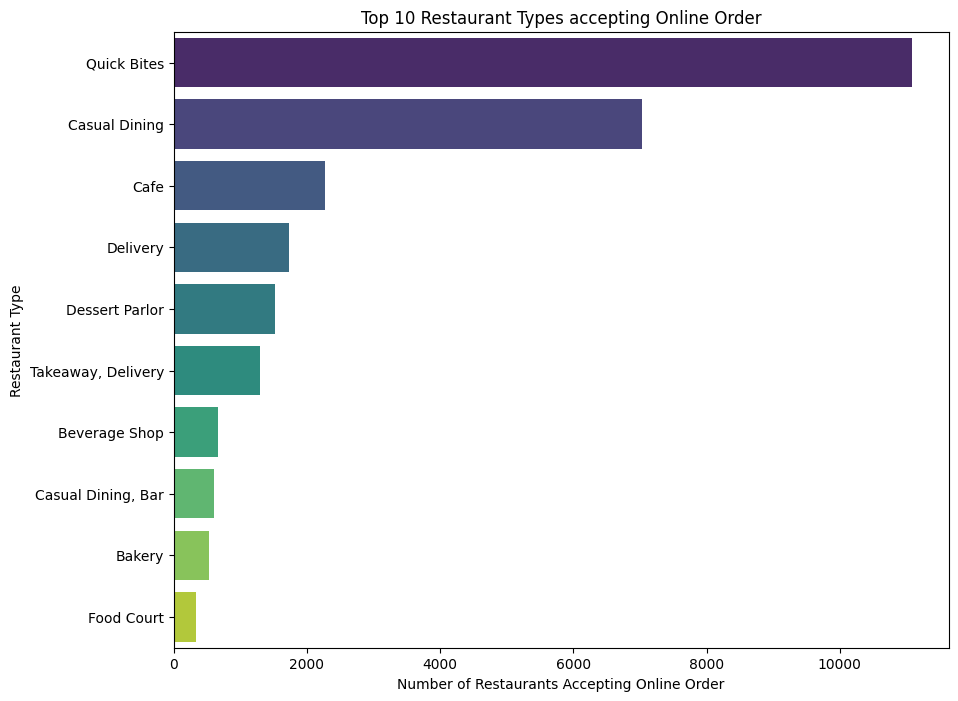

In [36]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='rest_type', data=online_count, palette='viridis')
plt.xlabel('Number of Restaurants Accepting Online Order')
plt.ylabel('Restaurant Type')
plt.title('Top 10 Restaurant Types accepting Online Order')
plt.show()

Quick Bites and Casual Dining are the most likely restaurant types to accept online orders.

C:\Users\Admin\AppData\Local\Temp\ipykernel_9828\1043905055.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='rest_type', data=book_count, palette='viridis')


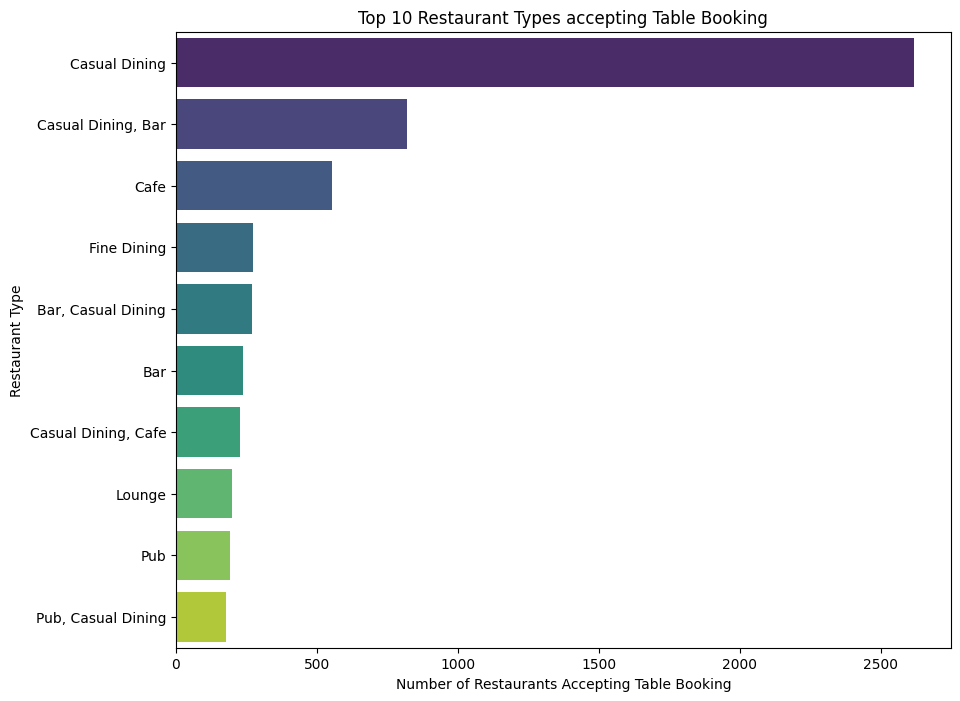

In [37]:
book_res = zomato[zomato['book_table']=='Yes']
book_count = pd.DataFrame(book_res.groupby('rest_type').size().sort_values(ascending=False).head(10))
book_count = book_count.rename(columns={0: 'count'}).reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='rest_type', data=book_count, palette='viridis')
plt.xlabel('Number of Restaurants Accepting Table Booking')
plt.ylabel('Restaurant Type')
plt.title('Top 10 Restaurant Types accepting Table Booking')
plt.show()

Casual Dining is the restaurant type that most likely to accept table booking

<br><br>
### Are there cuisines that have high ratings but relatively few restaurants, indicating a market opportunity to expand those offerings?

In [38]:
cuisine_stats = zomato_merged.groupby('cuisines').agg(
    num_res=pd.NamedAgg(column='cuisines', aggfunc='count'),
    avg_rating=pd.NamedAgg(column='rate', aggfunc='mean')
).reset_index()
print(cuisine_stats)

       cuisines  num_res  avg_rating
0        Afghan       64    3.923473
1       Afghani        8    3.837500
2       African        4    4.300000
3      American      925    4.015151
4        Andhra      549    3.653597
..          ...      ...         ...
185        Thai      131    4.028255
186     Tibetan      175    3.713181
187     Turkish       44    3.913677
188     Unknown       19    3.584470
189  Vietnamese       29    4.189655

[190 rows x 3 columns]


We define the thresholds for 'high rating' and 'low number of restaurants' as follows:
- High rating: Average rating ≥ 90th percentile of the rating distribution.
- Low number of restaurants: Number of restaurants ≤ 100.

In [39]:
print(zomato['rate'].quantile(0.9))

4.2


In [40]:
rating_threshold = 4.2
restaurant_threshold = 100

opportunity_cuisines = cuisine_stats[
    (cuisine_stats['avg_rating'] >= rating_threshold) &
    (cuisine_stats['num_res'] <= restaurant_threshold)
]

opportunity_cuisines = opportunity_cuisines.sort_values(by=['avg_rating', 'num_res'], ascending=[False, True])

print(opportunity_cuisines)

           cuisines  num_res  avg_rating
22        Cantonese        6    4.600000
102         African       13    4.592308
152       Malaysian       16    4.425000
86      Singaporean       46    4.417391
166           Parsi       15    4.406667
156  Middle Eastern        5    4.400000
182           Sushi        6    4.400000
12          Belgian        3    4.366667
90       Sri Lankan       15    4.306667
176     Singaporean        1    4.300000
17          British        3    4.300000
2           African        4    4.300000
134          German        4    4.300000
48           Jewish        6    4.300000
99            Vegan        6    4.300000
58        Malaysian       90    4.295556
34           German        3    4.266667
168      Portuguese       11    4.227273
20          Burmese       41    4.212195
53           Konkan       57    4.205263
65    Modern Indian       42    4.204826
85           Sindhi        4    4.200000
119         British        4    4.200000
172         Russ

C:\Users\Admin\AppData\Local\Temp\ipykernel_9828\2018421938.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_opportunities, x='avg_rating', y='cuisines', palette='viridis')


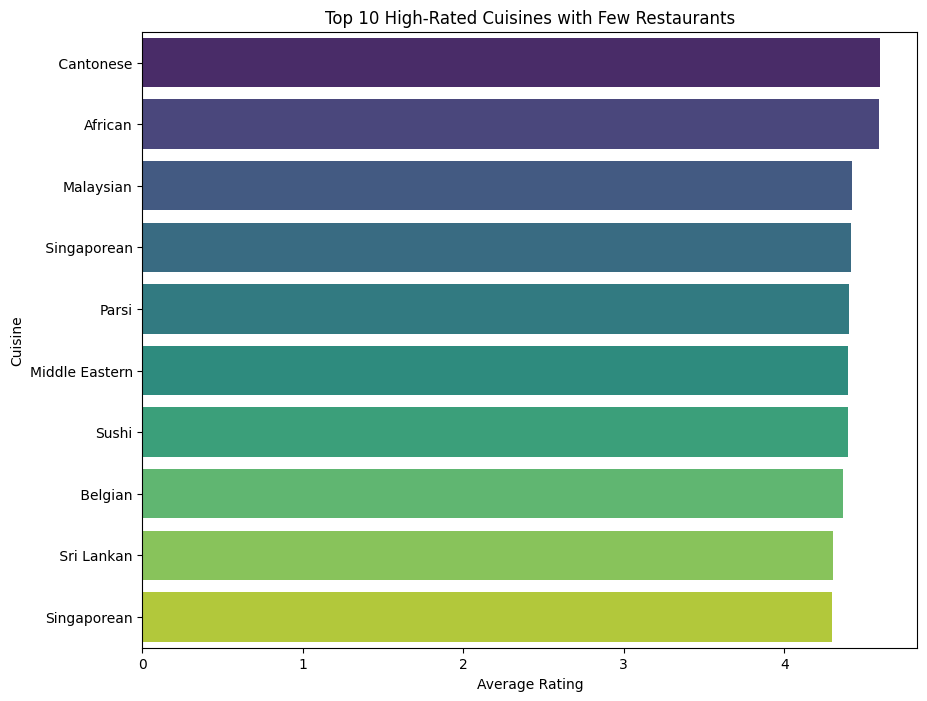

In [41]:
top_opportunities = opportunity_cuisines.head(10)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_opportunities, x='avg_rating', y='cuisines', palette='viridis')
plt.title('Top 10 High-Rated Cuisines with Few Restaurants')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

These are the top 10 cuisines with high ratings but few restaurants. Leading the list is Cantonese, followed by African, both with an average rating of around 4.6.

<br><br>
### What common characteristics do the top 10% of restaurants (by rating) share?

In [42]:
threshold_common = zomato['rate'].quantile(0.90)
top_10_percent = zomato[zomato['rate'] >= threshold_common]
not_top_10_percent = zomato[zomato['rate'] < threshold_common]
print(top_10_percent['name'])

7                                                   Onesta
9                                                Smacznego
11                                            Cafe Shuffle
12                                        The Coffee Shack
34                                                  Faasos
                               ...                        
51141                              Uno Chicago Bar & Grill
51145               The Whitefield Arms Pub & Microbrewery
51146                                      The Irish House
51147                             Shizusan Shophouse & Bar
51165    Chime - Sheraton Grand Bengaluru Whitefield Ho...
Name: name, Length: 6228, dtype: object


In [43]:
bins = [0, 300, 700, zomato['approx_cost(for two people)'].quantile(0.9), zomato['approx_cost(for two people)'].max() + 1]
labels = ['Low', 'Medium', 'High', 'Very High']
zomato['price_range'] = pd.cut(zomato['approx_cost(for two people)'], bins=bins, labels=labels, right=False)

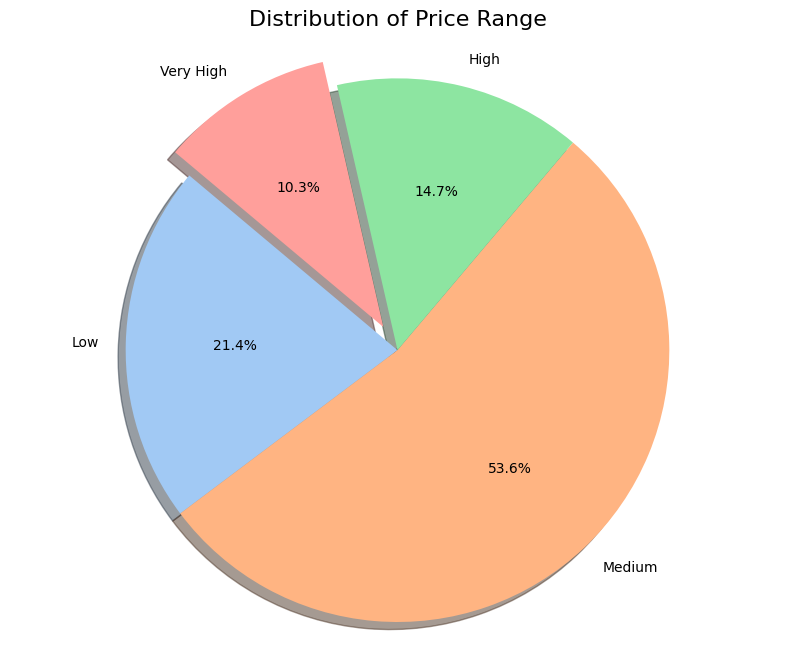

In [44]:
counts = zomato['price_range'].value_counts().reindex(['Low', 'Medium', 'High', 'Very High'])
labels = counts.index.tolist()
sizes = counts.values.tolist()
palette = sns.color_palette('pastel')[0:4]
colors = palette
explode = (0, 0, 0, 0.1)
plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.axis('equal')
plt.title('Distribution of Price Range', fontsize=16)
plt.show()

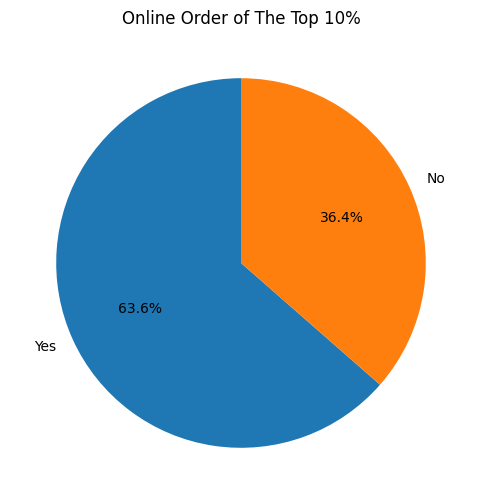

In [45]:
order_counts_top_10 = top_10_percent['online_order'].value_counts()
plt.figure(figsize=(6, 6))
order_counts_top_10.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Online Order of The Top 10%')
plt.ylabel('')
plt.show()

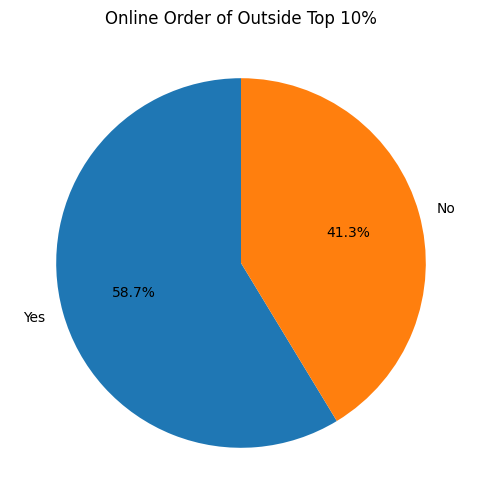

In [46]:
order_counts_outside_top_10 = not_top_10_percent['online_order'].value_counts()
plt.figure(figsize=(6, 6))
order_counts_outside_top_10.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Online Order of Outside Top 10%')
plt.ylabel('')
plt.show()

There is no significant difference in whether a top 10% restaurant accepts online orders or not.

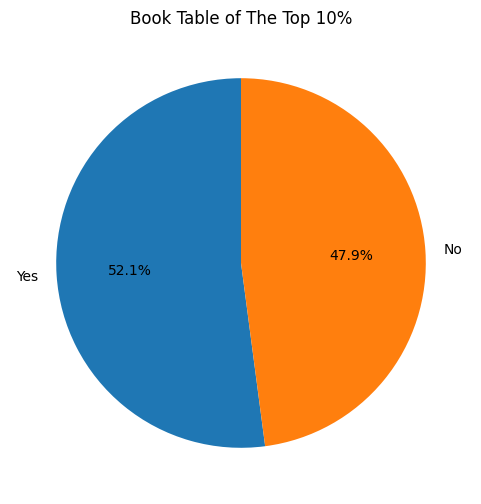

In [47]:
book_counts_top_10 = top_10_percent['book_table'].value_counts()
plt.figure(figsize=(6, 6))
book_counts_top_10.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Book Table of The Top 10%')
plt.ylabel('')
plt.show()

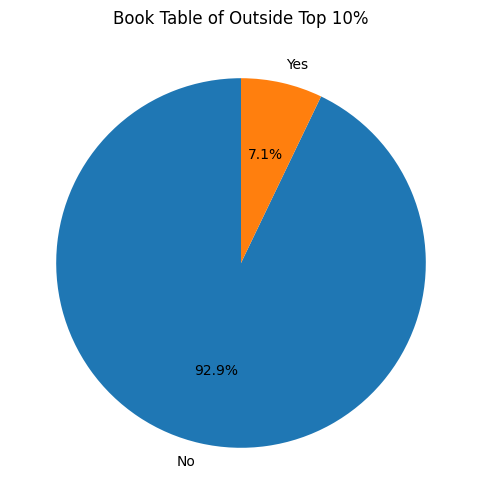

In [48]:
book_counts_outside_top_10 = not_top_10_percent['book_table'].value_counts()
plt.figure(figsize=(6, 6))
book_counts_outside_top_10.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Book Table of Outside Top 10%')
plt.ylabel('')
plt.show()

Compared to other restaurants, the top 10% are more likely to accept table bookings, with more than half offering this option. In contrast, only 7.1% of restaurants outside the top 10% accept table bookings.

C:\Users\Admin\AppData\Local\Temp\ipykernel_9828\3612956832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='rest_type', data=top_10_percent_rest_type, palette='viridis')


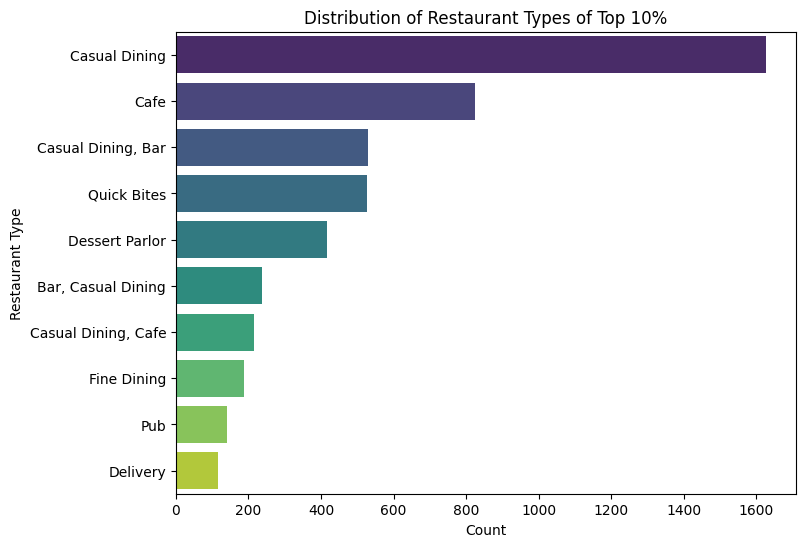

In [49]:
top_10_percent_rest_type = pd.DataFrame(top_10_percent['rest_type'].value_counts()[:10])
plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='rest_type', data=top_10_percent_rest_type, palette='viridis')
plt.title('Distribution of Restaurant Types of Top 10%')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9828\1784746162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='rest_type', data=outside_top_10_percent_rest_type, palette='viridis')


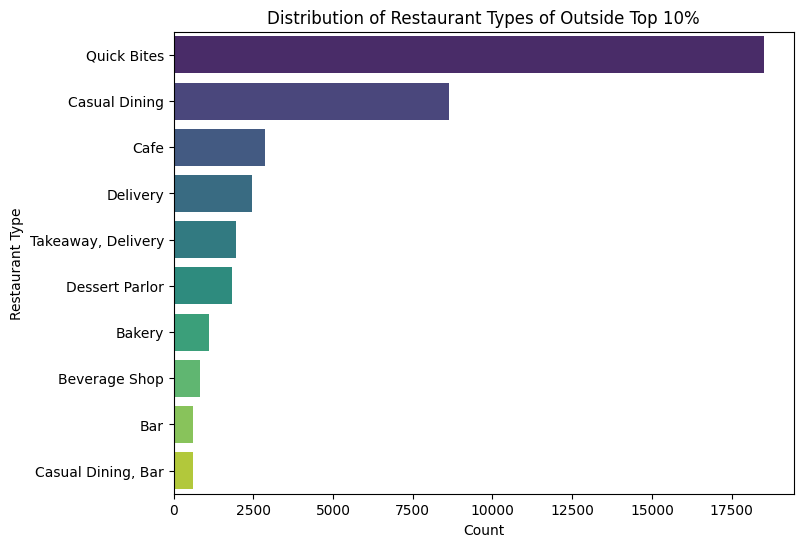

In [50]:
outside_top_10_percent_rest_type = pd.DataFrame(not_top_10_percent['rest_type'].value_counts()[:10])
plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='rest_type', data=outside_top_10_percent_rest_type, palette='viridis')
plt.title('Distribution of Restaurant Types of Outside Top 10%')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.show()

For the top 10% restaurants, the most popular types are Casual Dining, Cafe, Bar, and Quick Bites, in that order. For restaurants outside the top 10%, the most popular types are Quick Bites, Casual Dining, Cafe, and Delivery. This indicates that delivery and takeaway options are quite popular among restaurants outside the top 10%, but they are less common among the top 10%.

C:\Users\Admin\AppData\Local\Temp\ipykernel_9828\2530656335.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


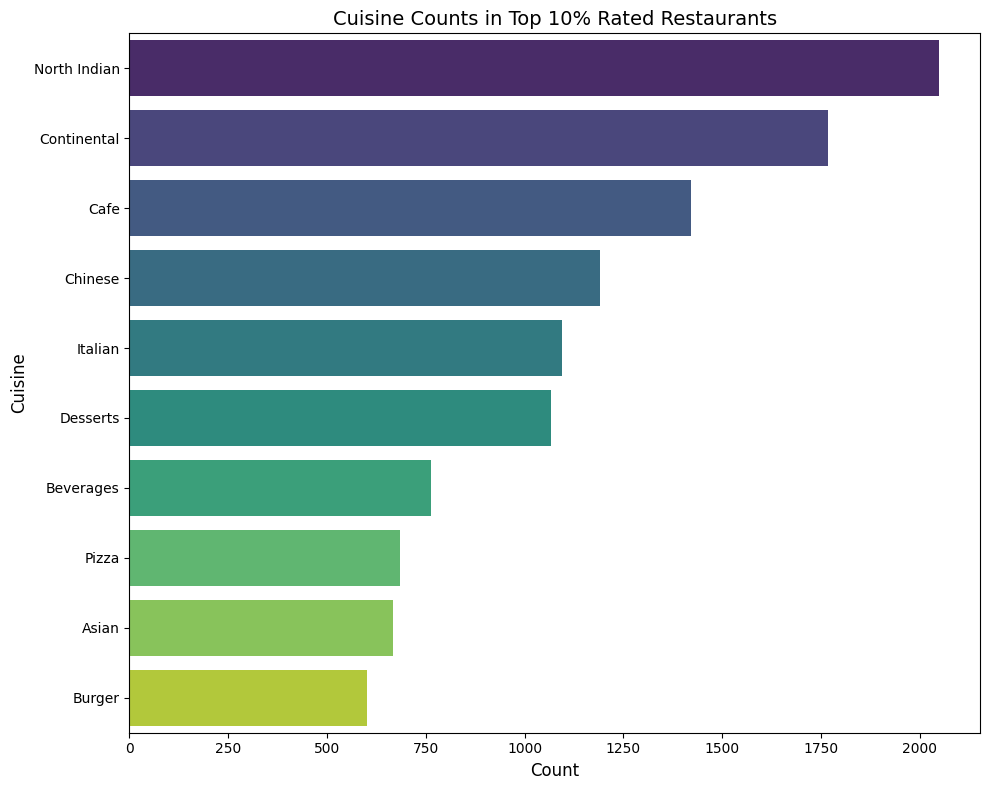

In [51]:
def extract_cuisines(df):
    def split_cuisines(x):
        return [cuisine.strip() for cuisine in x]
    cuisines_series = df['cuisines'].apply(split_cuisines)
    cuisines_list = [cuisine for sublist in cuisines_series for cuisine in sublist]
    return cuisines_list


top_cuisines = extract_cuisines(top_10_percent)
not_top_cuisines = extract_cuisines(not_top_10_percent)

top_counter = Counter(top_cuisines)
not_top_counter = Counter(not_top_cuisines)
cuisines_df = pd.DataFrame({'Cuisine': list(top_counter.keys())})
cuisines_df['Top 10%'] = cuisines_df['Cuisine'].map(top_counter)
cuisines_df['Not Top 10%'] = cuisines_df['Cuisine'].map(not_top_counter)
top_df = pd.DataFrame.from_dict(top_counter, orient='index', columns=['Top 10%'])
not_top_df = pd.DataFrame.from_dict(not_top_counter, orient='index', columns=['Not Top 10%'])
cuisines_df = top_df.join(not_top_df, how='outer').reset_index().rename(columns={'index': 'Cuisine'})

top_n = 10
cuisines_df_sorted_in = cuisines_df.sort_values('Top 10%', ascending=False)
cuisines_to_plot_in = cuisines_df_sorted_in.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Top 10%',
    y='Cuisine',
    data=cuisines_to_plot_in,
    palette='viridis'
)
plt.title('Cuisine Counts in Top 10% Rated Restaurants', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)
plt.tight_layout()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9828\2243410169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


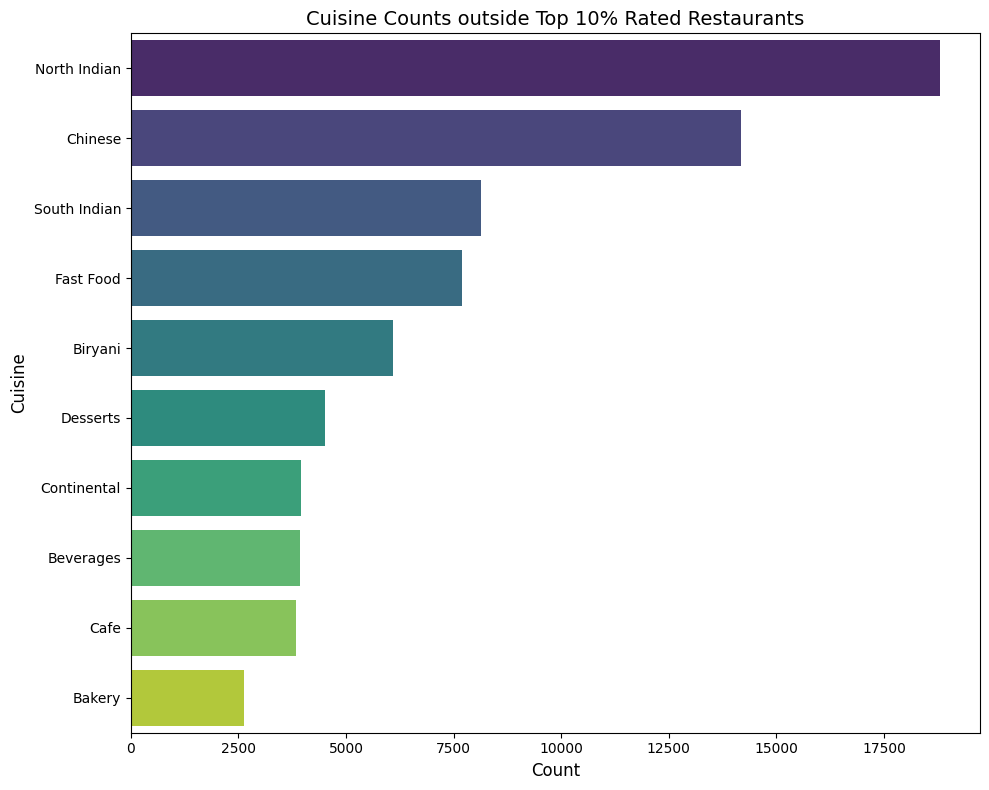

In [52]:
cuisines_df_sorted_out = cuisines_df.sort_values('Not Top 10%', ascending=False)
cuisines_to_plot_out = cuisines_df_sorted_out.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Not Top 10%',
    y='Cuisine',
    data=cuisines_to_plot_out,
    palette='viridis'
)
plt.title('Cuisine Counts outside Top 10% Rated Restaurants', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)
plt.tight_layout()

North Indian is the most popular cuisine among both the top 10% and restaurants outside the top 10%. However, while South Indian ranks as the third most popular cuisine outside the top 10%, it does not appear in the top 10 cuisines for the top 10% restaurants. Continental and Cafe are prominent among the top 10% restaurants, whereas Chinese and Fast Food are more common in the list for restaurants outside the top 10%.

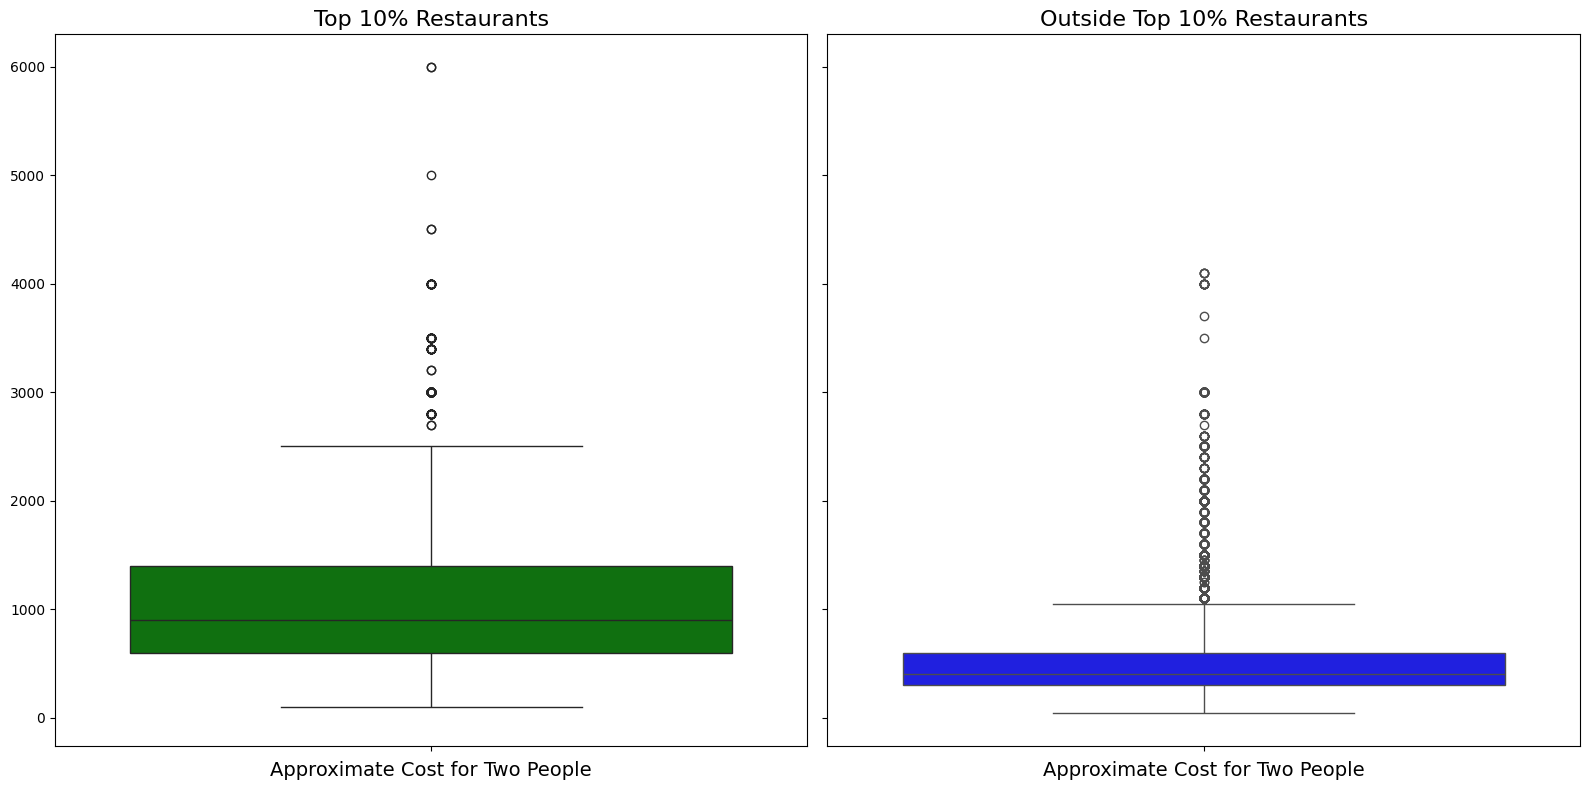

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
sns.boxplot(
    y=top_10_percent['approx_cost(for two people)'],
    color='green',
    ax=axes[0]
)
axes[0].set_title('Top 10% Restaurants', fontsize=16)
axes[0].set_xlabel('Approximate Cost for Two People', fontsize=14)
axes[0].set_ylabel('')

sns.boxplot(
    y=not_top_10_percent['approx_cost(for two people)'],
    color='blue',
    ax=axes[1]
)
axes[1].set_title('Outside Top 10% Restaurants', fontsize=16)
axes[1].set_xlabel('Approximate Cost for Two People', fontsize=14)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In general, the top 10% restaurants have higher costs compared to those outside the top 10%. Additionally, the interquartile range (IQR) for the top 10% is wider. Both groups have many large outliers, but the outliers in the top 10% represent higher values, indicating more expensive options.

C:\Users\Admin\AppData\Local\Temp\ipykernel_9828\4171379983.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='listed_in(city)', data=top_10_percent_location, palette='viridis')


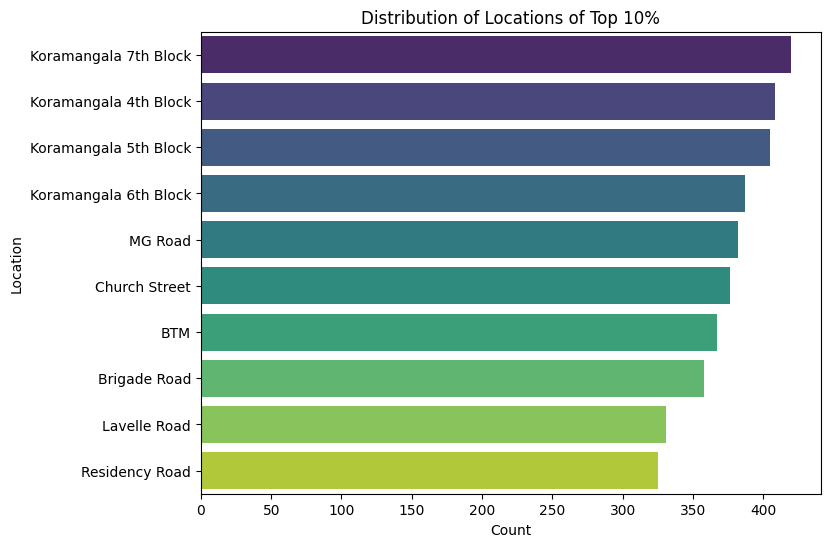

In [54]:
top_10_percent_location = pd.DataFrame(top_10_percent['listed_in(city)'].value_counts()[:10])
plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='listed_in(city)', data=top_10_percent_location, palette='viridis')
plt.title('Distribution of Locations of Top 10%')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9828\562543229.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='listed_in(city)', data=outside_top_10_percent_location, palette='viridis')


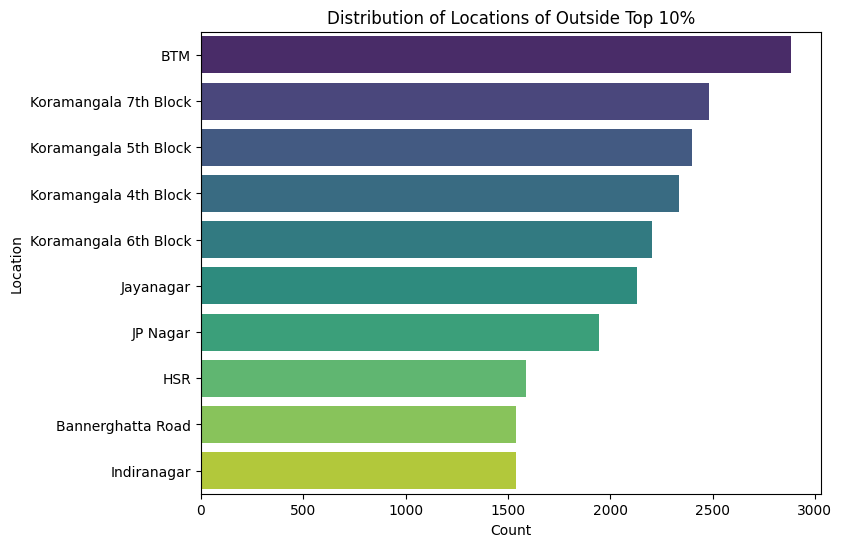

In [55]:
outside_top_10_percent_location = pd.DataFrame(not_top_10_percent['listed_in(city)'].value_counts()[:10])
plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='listed_in(city)', data=outside_top_10_percent_location, palette='viridis')
plt.title('Distribution of Locations of Outside Top 10%')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

Koramangala is a popular location for restaurants both in and outside the top 10%, which is understandable given its reputation as a major tourist attraction in Bengaluru. The urban Koramangala area is favored by young techies and students due to the presence of IT companies and colleges, making it a hotspot for restaurants. BTM is also a popular location for restaurants outside the top 10%, thanks to its affordability and amenities that appeal to students, young professionals, and families. However, it is less prominent among the top 10% restaurants. In contrast, locations like MG Road, Church Street, Brigade Road, Lavelle Road, and Residence Road are highly popular among the top 10% restaurants, as these areas are known for their luxury and high-end dining experiences.